In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from my_img_processor import My_Image
import matplotlib as mpl
import cv2
import math


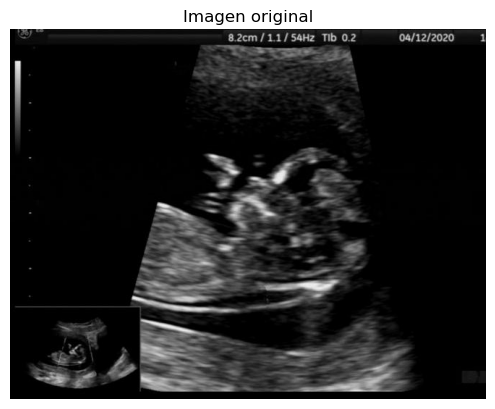

In [2]:
img_path = r'Dataset for Fetus Framework\Dataset for Fetus Framework\External Test Set\Standard\1383.png'
raw_img = My_Image(img_path)

fig_raw, ax_raw = plt.subplots()
ax_raw.imshow(raw_img, vmin=0, vmax=255, cmap='gray')
ax_raw.set_title('Imagen original')
plt.axis('off')
plt.show()

In [3]:
#Calcular la distancia
def calcular_distancia(punto1, punto2):
    return np.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)


img = My_Image(img_path)
imagen_binaria = img.binarizar_otsu()

#Definir la semilla para el crecimiento 
seed_point = (345, 369)  

#Definir el segundo punto para calcular la distancia máxima
second_point = (240, 378)  

max_distance = calcular_distancia(seed_point, second_point)
segmented_image = imagen_binaria.region_growing(seed_point, thresh=10, max_dist=max_distance)
cv2.imwrite('imagen_rg.png', segmented_image)
cv2.imshow('Imagen RG', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Ahora, medimos con el método de la elipse

In [4]:
# Hallamos el borde
segmented_image[segmented_image > 0] = 255
KL1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
border_seg = segmented_image.filter_w_kernel(KL1)

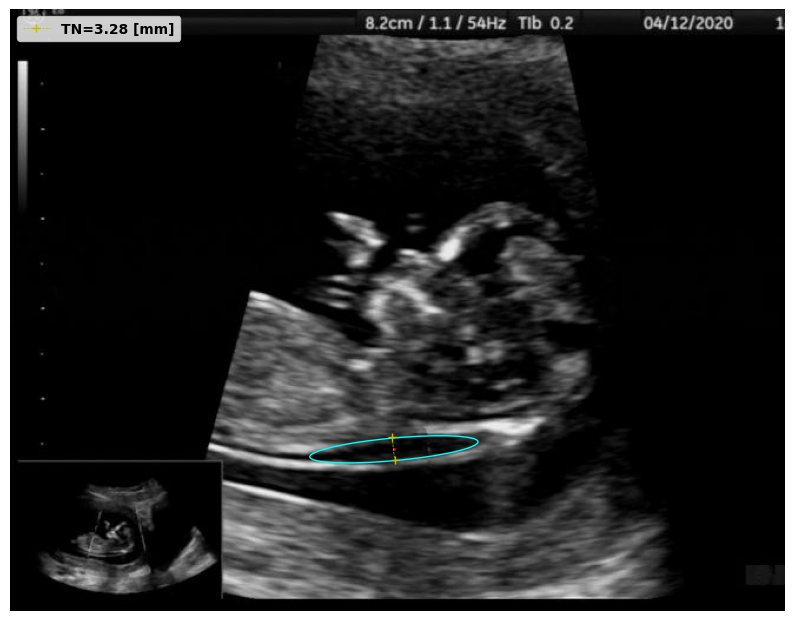

In [8]:
# Fitteamos la elipse nuevamente
ellipse_patch = border_seg.fit_ellipse()
raw_img.plot_with_ellipse(ellipse_patch, c=1/0.1719077568134172)